Team No : 

Reg No : 1020

Name : Keerthi Nallamalla

Date :Oct 23,2022

**Importing Required Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

**Uploading The Dataset Into Colab Notebook**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving data3.csv to data3.csv


**Loading Dataset**

In [3]:
dataset = pd.read_csv('https://internships-data.s3.ap-south-1.amazonaws.com/Assignments/Data+Science/data/ScreeningTest_18102022.csv')
dataset

,EnrollmentNo,QuizId,Correct,TimeTaken
0,1,187,15,18
1,2,187,17,12
2,3,187,13,11
3,4,187,18,3
4,5,187,17,5
...,...,...,...,...
236,237,189,14,12
237,238,189,13,6
238,239,189,13,18
239,240,189,13,4


**1.Identify Variables and their Types (Quantitative or Qualitative)**

In [4]:
dataset.columns


Index(['EnrollmentNo', 'QuizId', 'Correct', 'TimeTaken'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   EnrollmentNo  241 non-null    int64
 1   QuizId        241 non-null    int64
 2   Correct       241 non-null    int64
 3   TimeTaken     241 non-null    int64
dtypes: int64(4)
memory usage: 7.7 KB


**2.Size of Data (No. of Columns and Rows)**

In [6]:
dataset.shape

(241, 4)

In [7]:
dataset['EnrollmentNo'] = dataset['EnrollmentNo'].apply(str)

In [8]:
dataset['QuizId'] = dataset['QuizId'].apply(str)

In [9]:
df = dataset

**3.Prepare Histogram for Correct Anwers and Time Taken**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f799a4818d0>,
      dtype=object)

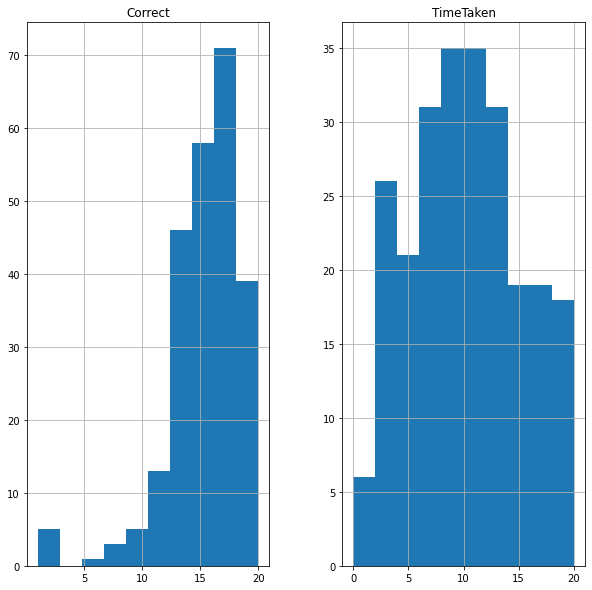

In [10]:
dataset.hist(figsize=(10,10),bins=10)

**4.Create Pie-Chart on Quiz Id**

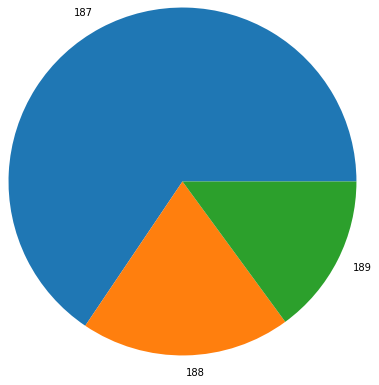

In [11]:
ids=df['QuizId'].value_counts()
labels=df['QuizId'].unique().tolist()
plt.pie(ids,labels=labels,radius=2)
plt.show()

**5.Find No. of Students for each Quiz Id**

In [12]:
dataset['QuizId'].value_counts()

187    158
188     47
189     36
Name: QuizId, dtype: int64

**6.Find Measure of Central Tendency: MEAN, MEDIAN, MODE**

In [13]:
#MEAN
print(dataset.mean(numeric_only=True))

Correct      15.543568
TimeTaken     9.730290
dtype: float64


In [14]:
#MEDIAN
print(dataset.median(numeric_only=True))

Correct      16.0
TimeTaken    10.0
dtype: float64


In [15]:
#MODE
print(dataset.median(numeric_only=True))

Correct      16.0
TimeTaken    10.0
dtype: float64


**7.Find Measure of Variance: Minimum, Maximum, Range, Mean Deviation, Standard Deviation, Co-efficient of Variation**

In [16]:
#Minimum,Maximum,Mean,Standard Deviation
dataset.describe()

,Correct,TimeTaken
count,241.000000,241.000000
mean,15.543568,9.730290
std,3.273500,4.943628
min,1.000000,0.000000
25%,14.000000,6.000000
50%,16.000000,10.000000
75%,18.000000,13.000000
max,20.000000,20.000000


In [18]:
#Range
print(df.max(numeric_only=True) - df.min(numeric_only=True))

Correct      19
TimeTaken    20
dtype: int64


In [17]:
#Co-efficient of variation
print(df.std(numeric_only=True)/df.mean(numeric_only=True))

Correct      0.210602
TimeTaken    0.508066
dtype: float64


**8.Measures of Position: Standard Scores, Inter-quartile Range**

In [19]:
#1st quartile
dataset.quantile(q=0.25,numeric_only=True)

Correct      14.0
TimeTaken     6.0
Name: 0.25, dtype: float64

In [20]:
#2nd quartile
dataset.quantile(q=0.5,numeric_only=True)

Correct      16.0
TimeTaken    10.0
Name: 0.5, dtype: float64

In [21]:
#3rd quartile
dataset.quantile(q=0.75,numeric_only=True)

Correct      18.0
TimeTaken    13.0
Name: 0.75, dtype: float64

In [22]:
iqr=dataset.quantile(q=0.75,numeric_only=True)-dataset.quantile(q=0.25,numeric_only=True)
print(iqr)

Correct      4.0
TimeTaken    7.0
dtype: float64


**9.Create Box Plot and Identify Outliers **

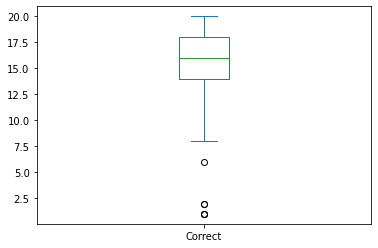

In [23]:
dataset.Correct.plot.box()

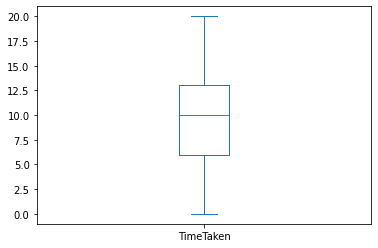

In [24]:
dataset.TimeTaken.plot.box()

**10.Identify and List out Outlier**

In [25]:
outliers=[]
def detect_outliers(dataset):
   threshold=3
   mean=np.mean(dataset)
   std=np.std(dataset)
   for i in dataset:
     z_score=(i-mean)/std
     if np.abs(z_score)>threshold:
       outliers.append(i)
       return outliers



In [30]:
df

,EnrollmentNo,QuizId,Correct,TimeTaken
0,1,187,15,18
1,2,187,17,12
2,3,187,13,11
3,4,187,18,3
4,5,187,17,5
...,...,...,...,...
236,237,189,14,12
237,238,189,13,6
238,239,189,13,18
239,240,189,13,4


In [26]:
df1 = df.iloc[:,3:4]
df1


,TimeTaken
0,18
1,12
2,11
3,3
4,5
...,...
236,12
237,6
238,18
239,4


In [32]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [37]:
outliers = find_outliers_IQR(df["Correct"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 6
max outlier value: 6
min outlier value: 1


20     1
67     1
71     1
85     6
100    2
170    2
Name: Correct, dtype: int64

**11.Any other Insights about malpractice**

In [28]:
#list of students who have coimpleted their test in less than 2 mins
df1=dataset[dataset.TimeTaken<2]
df1

,EnrollmentNo,QuizId,Correct,TimeTaken
59,60,187,14,1
67,68,187,1,0
74,75,187,9,1
87,88,187,19,1
100,101,187,2,0
170,171,188,2,0


In [31]:
#list of students who have coimpleted their test in less than and equalto 5 mins
df2=dataset[dataset.TimeTaken<=5]
df2

,EnrollmentNo,QuizId,Correct,TimeTaken
3,4,187,18,3
4,5,187,17,5
5,6,187,19,4
6,7,187,19,5
7,8,187,18,4
18,19,187,19,2
20,21,187,1,3
24,25,187,19,2
41,42,187,14,5
49,50,187,18,2
